In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing CSV file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In the above dataset different areas of a person are included which are required for a person to earn.So based on those requirements the persons income depends.So using those features we need to predict the label which is income.Some have more than 50k and some have less than 50K which is a binary classification problem.

In [3]:
#Checking for the shape of the data
data.shape

(32560, 15)

The dataset consists of 32560 rows and 15 columns.

In [4]:
#checking for the null method
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

By checking the null method we got to know that there no null values in the dataset.


In [5]:
#checking for the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Out dataset mostly consists of categorical (object) type,and remaining are of integer type.

In [6]:
#checking for statistical information
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From Stats we can get the information like mean,standard deviation,minimum value,25% value,50% value,75% value and maximum value.So the average age of a person is 38,the minimum age is 17 and max age is 90 all the different ages of a person income is taken in this dataset,so all the remaining columns also follows the same.

In [7]:
#checking for count of the label
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

The incomes of less than are equal to 50k are more compared to more than 50k so the data in the label column seems to be unbalanced.

In [8]:
#checking for categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [9]:
#checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
num_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [11]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [169]:
#Checking for value counts in all the categorical columns

In [12]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [14]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [15]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [17]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [18]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [19]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

### Data Preprocessing

We find some missing values with '?' so that we need to replace with the mode of the classes.

In [21]:
data['Workclass']=data['Workclass'].replace({' ?':' Private'})
data['Occupation']=data['Occupation'].replace({' ?':' Prof-specialty'})
data['Native_country']=data['Native_country'].replace({' ?':' United-States'})

### Feature Engineering

In [170]:
#Replacing the unique type of classes  with the new class names

In [171]:
data.Workclass=data.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
data.Workclass=data.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
data.Workclass=data.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [23]:
data.Education=data.Education.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'Primary-school')
data.Education=data.Education.replace([' HS-grad',' Prof-school'],' Higher-school')
data.Education=data.Education.replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' secondary-school')
data.Education=data.Education.replace([' Bachelors',],' Graduation')
data.Education=data.Education.replace([' Masters'],'Masters')
data.Education=data.Education.replace([' Doctorate'],' Post_graduation')

In [24]:
data.Marital_status=data.Marital_status.replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'],' Married')
data.Marital_status=data.Marital_status.replace([' Never-married'],' Single')
data.Marital_status=data.Marital_status.replace([' Divorced',' Widowed',' Separated'],' Others')

In [25]:
data.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Graduation,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Pvt-sector,215646,Higher-school,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Pvt-sector,234721,Primary-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Pvt-sector,338409,Graduation,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Pvt-sector,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Pvt-sector,160187,Primary-school,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Pvt-sector,209642,Higher-school,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Pvt-sector,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Pvt-sector,159449,Graduation,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Pvt-sector,280464,secondary-school,10,Married,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [26]:
#checking for unique values in dataset
data.apply(lambda x: len(x.unique()))

Age                  73
Workclass             3
Fnlwgt            21647
Education             6
Education_num        16
Marital_status        3
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

### Visualisation

<AxesSubplot:xlabel='Workclass', ylabel='count'>

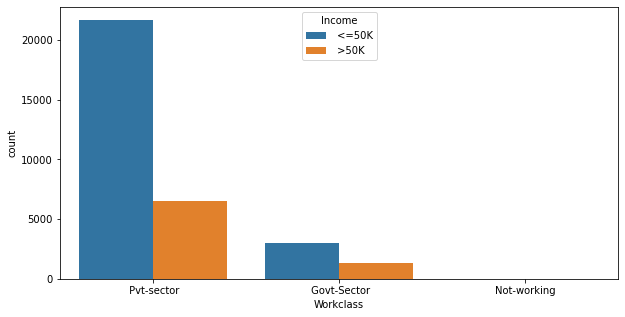

In [27]:
#Plotting the count plot between the persons information and label
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass',hue='Income',data=data)

The people who are working in the private sector are having more income,with higher in amount of both >50k and<=50k of income.And the people who are working in government sector then less compared to private sector.The people who are without pay and never worked they donot have income.

<AxesSubplot:xlabel='Education', ylabel='count'>

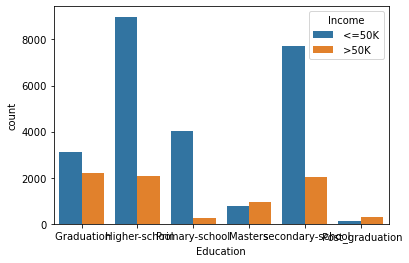

In [28]:
#count plot for both label and education
sns.countplot(x='Education',hue='Income',data=data
             )

The people who done there higher school has an income of <=50, and the people who done there graduation are earning more than 50k.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

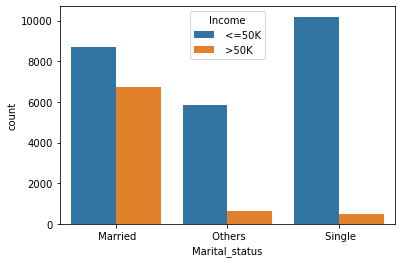

In [29]:
#Count plot for marital status ang income
sns.countplot(x='Marital_status',hue='Income',data=data)

The people who are bachelors or single they are earning <=50k and the people who are married they are earning more than 50k other are less compared to others.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

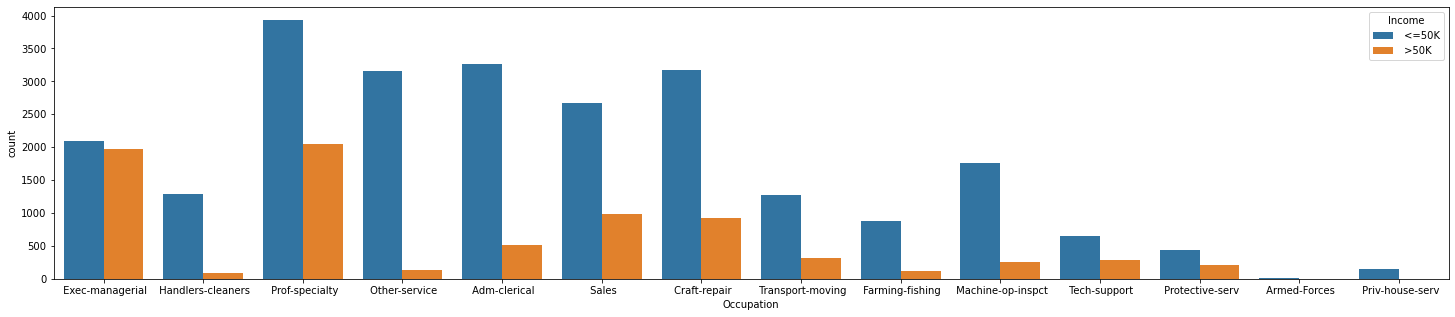

In [30]:
#Count plot for occupation and label
plt.figure(figsize=(25,5))
sns.countplot(x='Occupation',hue='Income',data=data)

The people who are in the position of prof-speciality are earning <=50 and >50,and also the people who are working as exec managerial are also earning >50k.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

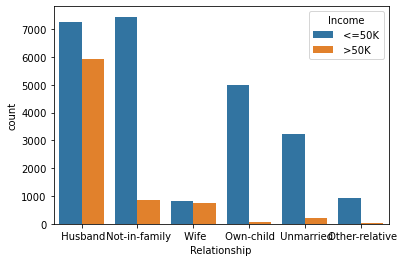

In [31]:
#Count plot for relationship and income
sns.countplot(x='Relationship',hue='Income',data=data)

In some families the husband has income of <=50 and >50k.If there is no family for a person they are earning <=50k,In 1000 families Wivies are equally earning both equally.In 5000 families their child is earning<=50k.

<AxesSubplot:xlabel='Race', ylabel='count'>

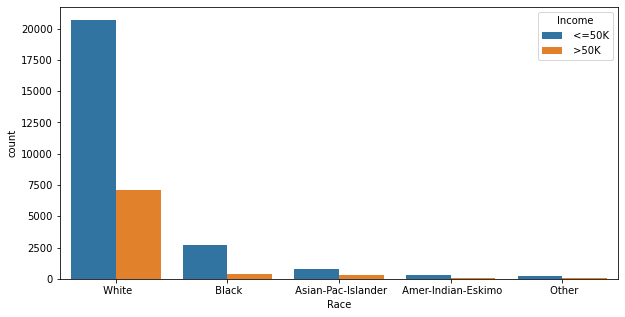

In [32]:
#Count plot for race and income
plt.figure(figsize=(10,5))
sns.countplot(x='Race',hue='Income',data=data)

Race means groups,White families have greater wealth than other racial groups which means the white families earning is more compared to the set of families.

<AxesSubplot:xlabel='Sex', ylabel='count'>

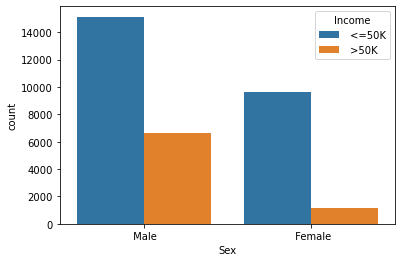

In [33]:
#count plot for sex and income
sns.countplot(x='Sex',hue='Income',data=data)

Male income is more compared to the female income

<AxesSubplot:xlabel='Native_country', ylabel='count'>

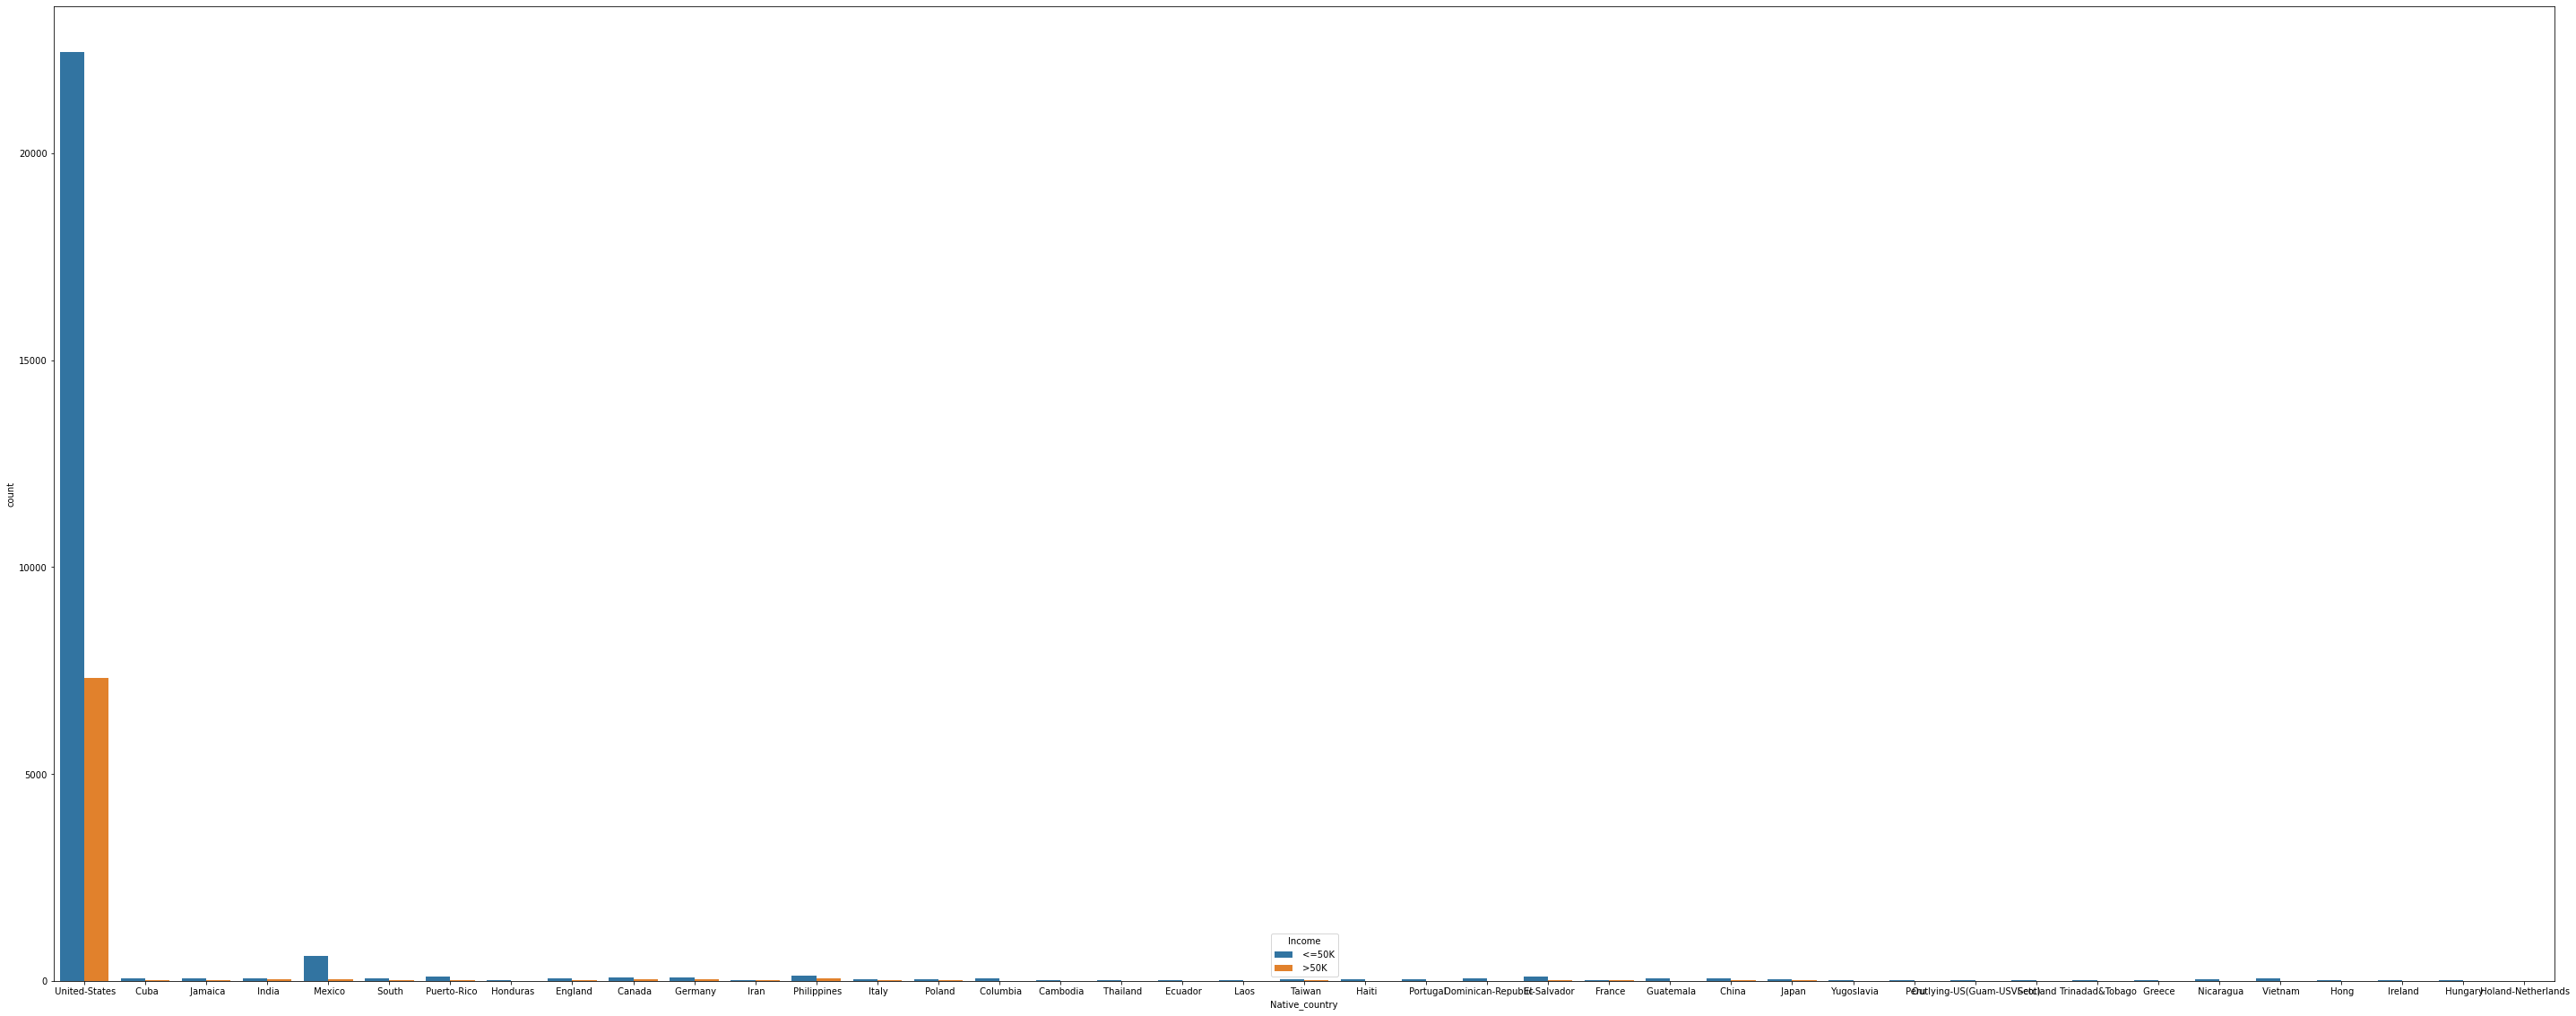

In [34]:
# Count plot for countries and income
plt.figure(figsize=(50,20))
sns.countplot(x='Native_country',hue='Income',data=data)

Compared to all the other countries United states earns more income compared to other countries.

<AxesSubplot:xlabel='Income', ylabel='count'>

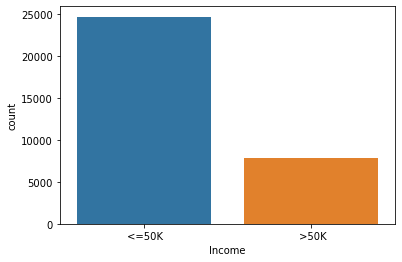

In [35]:
#Count plot for Income
sns.countplot(data['Income'])

In [36]:
#Replacing the classes with 0 and 1
data['Income']=data['Income'].replace({' <=50K': 0,' >50K': 1})

In [37]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Graduation,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Pvt-sector,215646,Higher-school,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Pvt-sector,234721,Primary-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Pvt-sector,338409,Graduation,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Pvt-sector,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,secondary-school,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Pvt-sector,154374,Higher-school,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Pvt-sector,151910,Higher-school,9,Others,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Pvt-sector,201490,Higher-school,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Correlation

In [38]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


There is no much correlation between one faeature to the other feature

### Heat Map

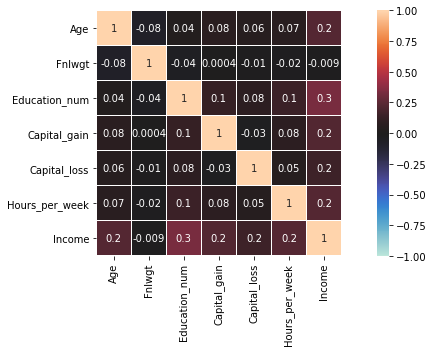

In [39]:
#Heat Map
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

There is no much correlation between one feature to the other faeture and label is also not correlated with the other features.

### Distribution Plot

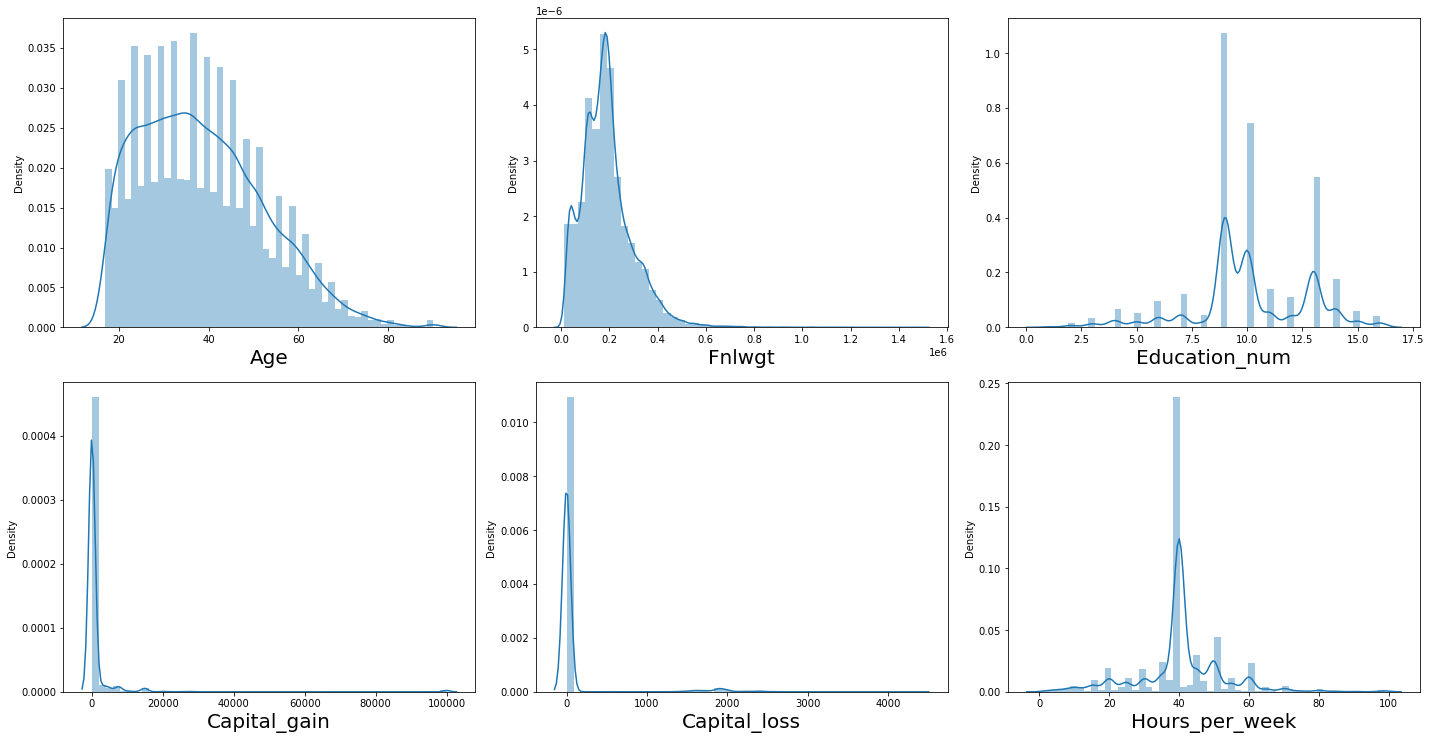

In [40]:
#Now lets plot dist plot and visualise how the data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


The data seems to be not normal there is so much of skewness present in the data so lets use some techniques to remove skewness

### Log Transformation

In [41]:
data['Age']=np.log(1+data['Age'])
data['Fnlwgt']=np.log(1+data['Fnlwgt'])
data['Education_num']=np.log(1+data['Education_num'])
data['Capital_gain']=np.log(1+data['Capital_gain'])
data['Capital_loss']=np.log(1+data['Capital_loss'])
data['Hours_per_week']=np.log(1+data['Hours_per_week'])

### Box Plot

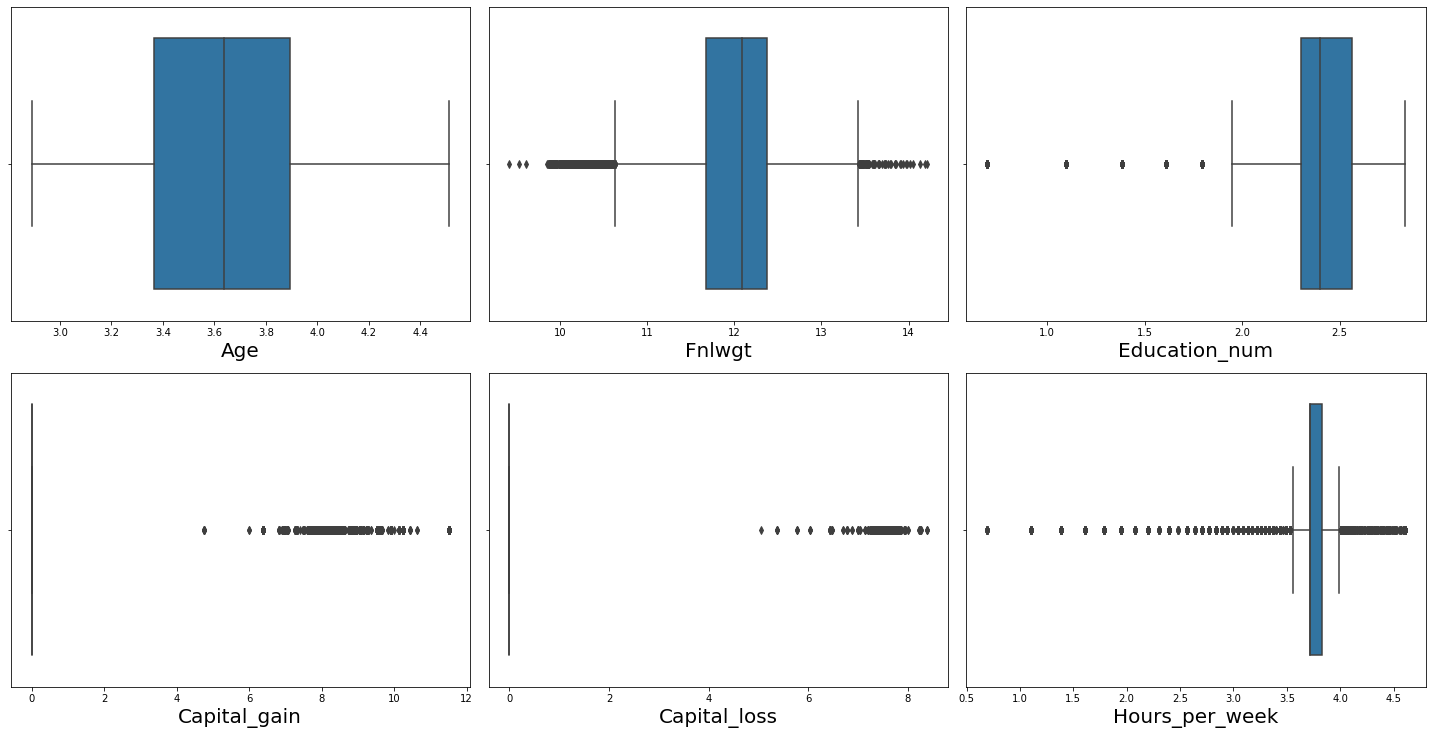

In [42]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


Our data seems to be some what better compared to before not exactly normal distribution but Ok

### Applying Z Score

In [43]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[0.8955433  1.03603342 0.97351073 0.29921644 0.22107807 2.65185967]
 [0.12914255 0.47183429 0.25533282 0.29921644 0.22107807 0.12456146]
 [1.05883861 0.60621773 1.07028421 0.29921644 0.22107807 0.12456146]
 ...
 [1.31182594 0.08363419 0.25533282 0.29921644 0.22107807 0.12456146]
 [1.37948811 0.36418346 0.25533282 0.29921644 0.22107807 1.60418498]
 [1.00543724 0.93014422 0.25533282 3.61918788 0.22107807 0.12456146]]


In [44]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [    7     8    22 ... 32538 32552 32559]


In [45]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data.drop(data.index[index])


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,Pvt-sector,11.330348,Graduation,2.639057,Married,Exec-managerial,Husband,White,Male,0.0,0.0,2.639057,United-States,0
1,3.663562,Pvt-sector,12.281398,Higher-school,2.302585,Others,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,3.713572,United-States,0
2,3.988984,Pvt-sector,12.366157,Primary-school,2.079442,Married,Handlers-cleaners,Husband,Black,Male,0.0,0.0,3.713572,United-States,0
3,3.367296,Pvt-sector,12.732013,Graduation,2.639057,Married,Prof-specialty,Wife,Black,Female,0.0,0.0,3.713572,Cuba,0
4,3.637586,Pvt-sector,12.558780,Masters,2.708050,Married,Exec-managerial,Wife,White,Female,0.0,0.0,3.713572,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.135494,Pvt-sector,12.644821,secondary-school,2.397895,Single,Protective-serv,Not-in-family,White,Male,0.0,0.0,3.713572,United-States,0
32555,3.332205,Pvt-sector,12.458010,secondary-school,2.564949,Married,Tech-support,Wife,White,Female,0.0,0.0,3.663562,United-States,0
32556,3.713572,Pvt-sector,11.947140,Higher-school,2.302585,Married,Machine-op-inspct,Husband,White,Male,0.0,0.0,3.713572,United-States,1
32557,4.077537,Pvt-sector,11.931050,Higher-school,2.302585,Others,Adm-clerical,Unmarried,White,Female,0.0,0.0,3.713572,United-States,0


### Encoding Techniques

In [46]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']
for col in cat_col:
    data[col]=lab_enc.fit_transform(data[col])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,1,11.330348,0,2.639057,0,3,0,4,1,0.000000,0.0,2.639057,United-States,0
1,3.663562,1,12.281398,1,2.302585,1,5,1,4,1,0.000000,0.0,3.713572,United-States,0
2,3.988984,1,12.366157,5,2.079442,0,5,0,2,1,0.000000,0.0,3.713572,United-States,0
3,3.367296,1,12.732013,0,2.639057,0,9,5,2,0,0.000000,0.0,3.713572,Cuba,0
4,3.637586,1,12.558780,4,2.708050,0,3,5,4,0,0.000000,0.0,3.713572,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,1,12.458010,3,2.564949,0,12,5,4,0,0.000000,0.0,3.663562,United-States,0
32556,3.713572,1,11.947140,1,2.302585,0,6,0,4,1,0.000000,0.0,3.713572,United-States,1
32557,4.077537,1,11.931050,1,2.302585,1,0,4,4,0,0.000000,0.0,3.713572,United-States,0
32558,3.135494,1,12.213500,1,2.302585,2,0,3,4,1,0.000000,0.0,3.044522,United-States,0


### Get Dummies Method

In [47]:
df=pd.get_dummies(data['Native_country'],drop_first=False)
df

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
#concatinating both the dataset and dummies
data=pd.concat([data,df],axis=1)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,3.931826,1,11.330348,0,2.639057,0,3,0,4,1,0.000000,0.0,2.639057,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.663562,1,12.281398,1,2.302585,1,5,1,4,1,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.988984,1,12.366157,5,2.079442,0,5,0,2,1,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.367296,1,12.732013,0,2.639057,0,9,5,2,0,0.000000,0.0,3.713572,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.637586,1,12.558780,4,2.708050,0,3,5,4,0,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,1,12.458010,3,2.564949,0,12,5,4,0,0.000000,0.0,3.663562,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,3.713572,1,11.947140,1,2.302585,0,6,0,4,1,0.000000,0.0,3.713572,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,4.077537,1,11.931050,1,2.302585,1,0,4,4,0,0.000000,0.0,3.713572,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,3.135494,1,12.213500,1,2.302585,2,0,3,4,1,0.000000,0.0,3.044522,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
#Since we got the dummies for country column so am dropping that column
data=data.drop(columns=['Native_country'],axis=1)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,3.931826,1,11.330348,0,2.639057,0,3,0,4,1,0.000000,0.0,2.639057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.663562,1,12.281398,1,2.302585,1,5,1,4,1,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3.988984,1,12.366157,5,2.079442,0,5,0,2,1,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.367296,1,12.732013,0,2.639057,0,9,5,2,0,0.000000,0.0,3.713572,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.637586,1,12.558780,4,2.708050,0,3,5,4,0,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,1,12.458010,3,2.564949,0,12,5,4,0,0.000000,0.0,3.663562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,3.713572,1,11.947140,1,2.302585,0,6,0,4,1,0.000000,0.0,3.713572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,4.077537,1,11.931050,1,2.302585,1,0,4,4,0,0.000000,0.0,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,3.135494,1,12.213500,1,2.302585,2,0,3,4,1,0.000000,0.0,3.044522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Seperating Features and Label

In [50]:
#Lets split the data into features and label and store them in x and y variables
x=data.drop(['Income'],axis=1)
y=data['Income']

### Strip PLot

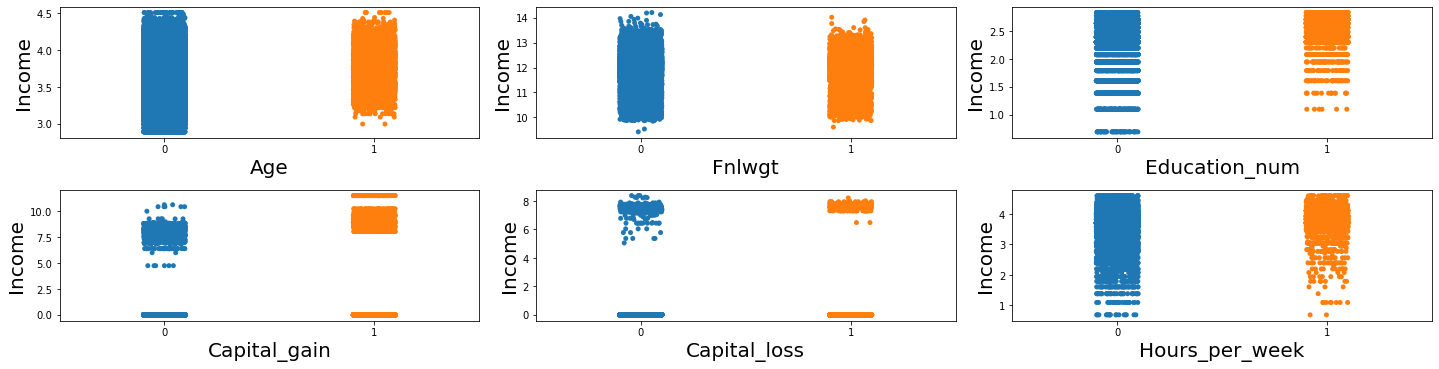

In [51]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.stripplot(y,data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()


1. The ages from 30 years to 45 years the people has high chance of earning <=50k income,the people whose age are from 32 to 42 years of age then they can earn >50k of income.
2.The final weights of the populations income with <=50k is from 10 to 13.2 and >50k is from 10.2 to 13.
3.The education number from 2 to 2.9 they are earning<=50k income and the people with education number from 2.5 and more they are earning more than 50k income.
4.If the capital gain of the population is from 7 to 8.5 they are earning <=50k,and from 8 to 10 capital gain then they are earning more than 50k income.
5.If the capital loss is between 6.5 to 7.8 then the income will be <=50k,and if it is from 7.8 to 8 then its is >50k.
6.If populations working hours for week is betwwen 15 to 48 hours then there income will be <=50k,and if it is of 30 and above then they have an income >50k.

### Standardisation

In [52]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
x[feature_scale]=scaler.fit_transform(x[feature_scale])
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.895543,1,-1.036033,0,0.973511,0,3,0,4,1,-0.299216,-0.221078,-2.651860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.129143,1,0.471834,1,-0.255333,1,5,1,4,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.058839,1,0.606218,5,-1.070284,0,5,0,2,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.717256,1,1.186274,0,0.973511,0,9,5,2,0,-0.299216,-0.221078,0.124561,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.054933,1,0.911617,4,1.225482,0,3,5,4,0,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.817508,1,0.751848,3,0.702858,0,12,5,4,0,-0.299216,-0.221078,-0.004660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0.272017,1,-0.058124,1,-0.255333,0,6,0,4,1,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,1.311826,1,-0.083634,1,-0.255333,1,0,4,4,0,-0.299216,-0.221078,0.124561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,-1.379488,1,0.364183,1,-0.255333,2,0,3,4,1,-0.299216,-0.221078,-1.604185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### SMOTE

In [53]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()


1    24719
0    24719
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

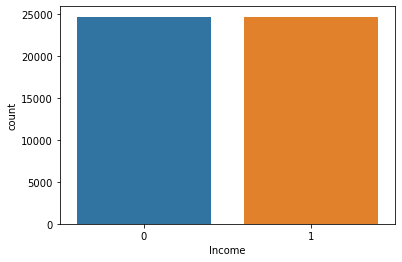

In [54]:
#count plot after upsampling
sns.countplot(y_over)

### Principle Component Analysis

In [58]:
#importing PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_over)
var_cumu=np.cumsum(pca.explained_variance_ratio_)*100
var_cumu

array([ 53.82291966,  65.38201729,  74.45613014,  80.0291034 ,
        84.47879997,  87.75083875,  90.61130969,  93.18259878,
        95.43447248,  97.58232426,  98.79697875,  99.22314068,
        99.57025635,  99.81287585,  99.84751701,  99.86239433,
        99.87196807,  99.88069575,  99.88916181,  99.89704043,
        99.90426358,  99.91103452,  99.9171696 ,  99.92312097,
        99.92876162,  99.9341022 ,  99.93916737,  99.94392375,
        99.94856295,  99.95301818,  99.95730252,  99.96143236,
        99.96549603,  99.96887797,  99.97188447,  99.97465042,
        99.97712915,  99.97941009,  99.9815148 ,  99.98352433,
        99.98548836,  99.98726923,  99.98886747,  99.9903419 ,
        99.99165862,  99.99294465,  99.99419236,  99.99535396,
        99.99642108,  99.99737431,  99.99827515,  99.9991387 ,
        99.99993076, 100.        ])

In [59]:
k=np.argmax(var_cumu>99)
k

11

### Scree plot

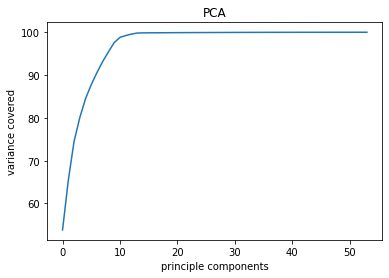

In [60]:
#checking from plot
plt.figure()
plt.plot(var_cumu)
plt.xlabel('principle components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [61]:
finalPCA=PCA(n_components=11)
final_data=finalPCA.fit_transform(x_over)
data_component=pd.DataFrame(final_data)
data_component

,0,1,2,3,4,5,6,7,8,9,10
0,-3.148918,-1.826873,-1.095613,-0.447672,-0.840365,1.160032,-0.038561,2.909550,-0.416718,-0.988630,-0.342364
1,-1.213432,-0.403353,-0.599046,-0.365162,-0.761380,-0.492218,-0.074121,0.206608,-0.165123,0.587695,0.313377
2,-1.214725,0.667220,3.485150,-0.104920,-0.307707,-0.272409,-1.019001,0.047445,1.678458,-0.337840,-0.002796
3,2.716207,2.052771,-3.863406,0.031716,0.129231,-0.791659,-1.354547,-0.730323,1.373221,-0.436243,-1.358213
4,-3.284616,3.517803,-0.566166,0.397466,0.869277,-0.127303,-1.649101,-1.178360,-0.993908,-1.338013,-0.860635
...,...,...,...,...,...,...,...,...,...,...,...
49433,-0.163249,-2.321824,-0.973486,-0.381154,-0.667300,0.314854,-0.785011,0.347329,-0.264253,-0.220334,0.168288
49434,-0.190359,-1.540604,0.117063,-0.369619,-0.706284,0.390886,-0.656999,0.467802,-0.061034,0.597177,0.071498
49435,2.821021,-0.590316,2.192830,-0.062416,0.031262,2.394679,-0.100769,-1.097528,-0.441425,-1.058715,0.266186
49436,2.829459,-2.051130,-0.350533,-0.332510,-0.526795,-0.370075,-0.426443,-2.238200,0.615004,-0.446877,-0.120826


In [62]:
#Splitting the data into train and test 
#importing the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_component,y_over,test_size=0.25,random_state=500)

In [63]:
#Importing some classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [64]:
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

### Logistic Regression

In [65]:
#Lets use Logistic regression algorithm to build our model
#instantiating
lr=LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [66]:
#predicting
y_pred_lr=lr.predict(x_test)

### Training Score

In [67]:
lr.score(x_train,y_train)

0.8137709693079455

### Testing Score

In [68]:
#checking the score of our model
lr.score(x_test,y_test)

0.811084142394822

### Accuracy Score

In [69]:
#Finding the accuracy score
accuracy_score(y_test,y_pred_lr)


0.811084142394822

### Evaluation Metrics

In [70]:
#finding cross validation score
np.mean(cross_val_score(lr,data_component,y_over,cv=5))

0.812533053520968

### Evaluation Metrics

In [71]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      6193
           1       0.78      0.86      0.82      6167

    accuracy                           0.81     12360
   macro avg       0.81      0.81      0.81     12360
weighted avg       0.81      0.81      0.81     12360



In [72]:
confusion_matrix(y_test,y_pred_lr)

array([[4713, 1480],
       [ 855, 5312]], dtype=int64)

### KNeighbors Classifier

In [73]:
#instansiating
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

### Prediction

In [74]:
y_pred_knn=knn.predict(x_test)

### Training Score

In [75]:
knn.score(x_train,y_train)

0.8949511839905065

### Testing Score

In [76]:
knn.score(x_test,y_test)

0.8492718446601941

### Accuracy score

In [77]:
accuracy_score(y_test,y_pred_knn)

0.8492718446601941

### Cross validation score

In [78]:
np.mean(cross_val_score(knn,data_component,y_over,cv=5))

0.8543634084573153

### Evaluation Metrics

In [79]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      6193
           1       0.81      0.92      0.86      6167

    accuracy                           0.85     12360
   macro avg       0.86      0.85      0.85     12360
weighted avg       0.86      0.85      0.85     12360



In [80]:
confusion_matrix(y_test,y_pred_knn)

array([[4839, 1354],
       [ 509, 5658]], dtype=int64)

### Decision Tree Classifier

In [81]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### prediction

In [82]:
y_pred_dt=dt.predict(x_test)

### training score

In [83]:
dt.score(x_train,y_train)

0.9999460596580182

### Accuracy Score

In [84]:
accuracy_score(y_test,y_pred_dt)

0.8265372168284789

### Cross Validation score

In [85]:
#Cross validation score
np.mean(cross_val_score(dt,data_component,y_over,cv=5))

0.8304142412006481

### Evaluation Metrics

In [86]:
#score
dt.score(x_test,y_test)

0.8265372168284789

In [87]:
#printing classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6193
           1       0.82      0.84      0.83      6167

    accuracy                           0.83     12360
   macro avg       0.83      0.83      0.83     12360
weighted avg       0.83      0.83      0.83     12360



In [88]:
#printing confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[5025, 1168],
       [ 976, 5191]], dtype=int64)

### Random Forest Classifier

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

### Prediction

In [90]:
y_pred_rf=rf.predict(x_test)

### Training Score

In [91]:
rf.score(x_train,y_train)

0.9999460596580182

### Accuracy score

In [92]:
accuracy_score(y_test,y_pred_rf)

0.871116504854369

### Cross Validation Score

In [93]:
np.mean(cross_val_score(rf,data_component,y_over,cv=5))

0.8763303812040458

### Evaluation Metrics

In [94]:
#Printing score
rf.score(x_test,y_test)

0.871116504854369

In [95]:
#Classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      6193
           1       0.85      0.90      0.88      6167

    accuracy                           0.87     12360
   macro avg       0.87      0.87      0.87     12360
weighted avg       0.87      0.87      0.87     12360



In [96]:
#confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[5191, 1002],
       [ 591, 5576]], dtype=int64)

### Support Vector Classifier

In [97]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

### Prediction

In [98]:
 y_pred_svm=svm.predict(x_test)

### Training Score

In [99]:
svm.score(x_train,y_train)

0.8317061330168833

### Accuracy score

In [100]:
accuracy_score(y_test,y_pred_svm)

0.8226537216828479

### cross validation score

In [101]:
np.mean(cross_val_score(svm,data_component,y_over,cv=5))

0.8277642825088549

### Evaluation Metrics

In [102]:
svm.score(x_test,y_test)

0.8226537216828479

In [103]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      6193
           1       0.78      0.89      0.83      6167

    accuracy                           0.82     12360
   macro avg       0.83      0.82      0.82     12360
weighted avg       0.83      0.82      0.82     12360



In [104]:
confusion_matrix(y_test,y_pred_svm)

array([[4664, 1529],
       [ 663, 5504]], dtype=int64)

In [105]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[08:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [106]:
y_pred_xgb=xgb.predict(x_test)

### Training Score

In [107]:
xgb.score(x_train,y_train)

0.9075192836722585

### Accuracy Score

In [108]:
accuracy_score(y_test,y_pred_xgb)

0.8576860841423948

In [109]:
np.mean(cross_val_score(xgb,data_component,y_over,cv=5))

[08:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8558805010371241

### Evaluation Metrics

In [110]:
#Checking for score
xgb.score(x_test,y_test)

0.8576860841423948

In [111]:
#Classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      6193
           1       0.83      0.90      0.86      6167

    accuracy                           0.86     12360
   macro avg       0.86      0.86      0.86     12360
weighted avg       0.86      0.86      0.86     12360



In [112]:
#printing confusion_matrix
confusion_matrix(y_test,y_pred_xgb)

array([[5053, 1140],
       [ 619, 5548]], dtype=int64)

### ROC AUC Score

In [113]:
#Logistic Regression
roc_auc_score(y_test,y_pred_lr)

0.8111896762459361

In [114]:
### KNN
roc_auc_score(y_test,y_pred_knn)

0.8494149896611171

In [115]:
#Decision Tree Classifier
roc_auc_score(y_test,y_pred_dt)

0.8265691260612663

In [116]:
#random Forest Classifier
roc_auc_score(y_test,y_pred_rf)

0.871185883327947

In [117]:
#Support Vector Classifier
roc_auc_score(y_test,y_pred_svm)

0.8228003229243142

In [118]:
#Extreme Gradient Boost classifier
roc_auc_score(y_test,y_pred_xgb)

0.8577741242715043

### Final Model

### Random Forest Classifier

Since our final model is Random forest classifier because it has best accuracy score and Cross validation score and also Roc auc score is also good compared to all the other models.So am going with Random Forest Classifier as my model for this dataset.

### Hyper Parameter Tuning

In [119]:
#Hyper Parameter Tuning
paramgrid={'n_estimators':[20,40,100],'criterion':['entropy'],'max_depth': [5,10,15,20],'max_features':['auto','log2','sqrt'],'min_samples_leaf':np.arange(2,10),'min_samples_split':[5,10,15,20]} 
grid_search = GridSearchCV(rf, param_grid=paramgrid, cv=10, n_jobs=-1) 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [20, 40, 100]})

In [120]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [133]:
#Instantiating the parameters which are obtained while tuning
rf=RandomForestClassifier(criterion='entropy',max_depth=20,max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=50)

In [143]:
#Prediction
y_pred_rf=rf.predict(x_test)

In [145]:
#Accuracy_score
accuracy_score(y_test,y_pred_rf)

0.8653721682847897

In [146]:
#Cross validation score
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.8630208921492477

In [137]:
#confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[5075, 1118],
       [ 546, 5621]], dtype=int64)

There is no improvement in the score after using Grid search cv so even though we have a good score.So Random Forest classifier is our best fit model.

In [147]:
#Area under curve
auc=roc_auc_score(y_test,y_pred_rf)
auc

0.8654689222004339

In [149]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_rf)
fpr

array([0.       , 0.1805264, 1.       ])

In [150]:
#True positive rate values
tpr

array([0.        , 0.91146425, 1.        ])

In [151]:
#Thresholds
thresholds

array([2, 1, 0], dtype=int64)

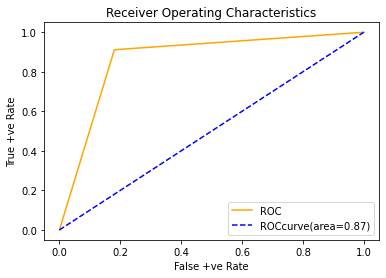

In [153]:
#PLot for the roc auc 
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCcurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()


The area under which the model occupied is 87% of the total area using random forest, so that is our best fit model.

### saving the model

In [155]:
#importing pickle
import pickle
filename='Census Income Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion

In [156]:
a=np.array(y_test)
predicted=np.array(y_pred_rf)
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
12355,1,1
12356,0,0
12357,1,1
12358,1,1


### Count Plot

<AxesSubplot:ylabel='count'>

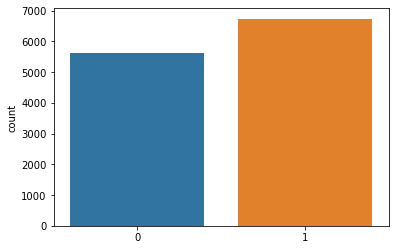

In [166]:
sns.countplot(y_pred_rf)

count plot for both the actual and predicted Income.We predicted more than 5800 members of population has an income <=50K and 6800 members of population has >50K Income.

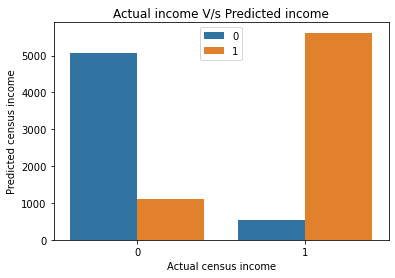

In [165]:
#Curve for actual and predicted value
sns.countplot(x=y_test,hue=y_pred_rf)
plt.xlabel('Actual census income')
plt.ylabel('Predicted census income')
plt.title('Actual income V/s Predicted income')
plt.show()

We have achieved 87% of accuracy score,cross validation score adnd area with Random Forest Classifier. 